# Lab 03: Summarizing and Plotting Data

This lab is presented with some revisions from [Dennis Sun at Cal Poly](https://web.calpoly.edu/~dsun09/index.html) and his [Data301 Course](http://users.csc.calpoly.edu/~dsun09/data301/lectures.html)

### When you have filled out all the questions, submit via [Tulane Canvas](https://tulane.instructure.com/)

In [1]:
# first, mount your google drive, change to the course folder, pull latest changes, and change to the lab folder.
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/cmps3160
!git pull
%cd _labs/Lab03

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/cmps3160
Already up to date.
/content/drive/My Drive/cmps3160/_labs/Lab03


In the previous section, we emphasized the difference between quantitative and categorical variables. The distinction is not merely pedantic; `pandas` will actually behave differently depending on whether it thinks a variable is quantitative or categorical.

It is not easy for a human to make sense of _all_ the values of a variable. In this section, we focus on ways to reduce the values to just a handful of summary statistics. Our working example will again be the Titanic data set, which contains both quantitative and categorical variables.

In [2]:
import pandas as pd
pd.options.display.max_rows = 8

df = pd.read_csv("../data/titanic.csv")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


To get a quick summary of a variable, we can use the `.describe()` function. Let's see what happens when we call `.describe()` on a quantitative variable, like `age`.

In [3]:
df.age.describe()

count    1046.000000
mean       29.881135
std        14.413500
min         0.166700
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64

It returns the count (the number of observations with non-missing values), the mean, the standard deviation (`std`), and various percentiles (`min`, `25%`, `50%`, `75%`, `max`).

Now, what if we call `.describe()` on a categorical variable, like `embarked`? This is a variable that takes on the values `C`, `Q`, or `S`, depending on whether the passenger embarked at Cherbourg, Queenstown, or Southampton.

In [4]:
df.embarked.describe()

count     1307
unique       3
top          S
freq       914
Name: embarked, dtype: object

The description of this variable is very different. We still get the count (of non-missing values). But instead of the mean and standard deviation (how would you calculate the mean of `Q` and `S`, anyway?), we get the number of unique values (`unique`), the value that appeared most often (`top`), and how often it appeared (`freq`). These are more natural summaries for a categorical variable, which only take on a limited set of values, where the values are often not even numeric.

The `.describe()` function only provides a handful of the many summary statistics that are available in `pandas`. We extract additional summary statistics below.

## Summary Statistics for Quantitative Variables

What statistics should we use to summarize a quantitative variable? The most salient features of a quantitative variable are its **center** and **spread**.

### Measures of Center

Some statistics measure the **center** of a variable. Two commonly used measures of the center are:

- the **mean** (a.k.a. average): the sum of the values divided by the count
- the **median**: the middle value when you sort the values (i.e., a value such that 50% of the values lie below and 50% of the values lie above)

A measure of center gives us information about the "typical" value of a variable. For example, you might not know whether a typical fare on the Titanic was £1, £10, or £100. But if we calculate the mean:

In [5]:
df.fare.mean()

33.29547928134557

we see that a typical fare is around £30.

Let's see what the median says about the "typical" fare:

In [6]:
df.fare.median()

14.4542

The median is quite different from the mean! It says that about 50% of the passengers paid less than £15 and about 50% paid more, so another reasonable value for the "typical" fare is £15.

The mean was twice the median! What explains this discrepancy? The reason is that the mean is very sensitive to extreme values. To see this, let's look at the highest fare that any passenger paid.

In [7]:
df.fare.max()

512.3292

The highest fare paid was over £500! Even if most passengers paid less than £15, extreme values like this one will drag the mean upward. On the other hand, since the median is always the middle value, it is not affected by the extreme values, as long as the ordering of the values is not changed.

To drive this point home, let's see what would happen to the mean and median if that maximum fare were actually £10,000.

In [8]:
fare_10k = df.fare.replace(df.fare.max(), 10000)
fare_10k.mean(), fare_10k.median()

(62.309763073394485, 14.4542)

Notice how the mean is now over £60, but the median is unchanged.

Just to satisfy our curiosity, let's learn more about this passenger who paid the maximum fare. To do this, we have to find the row that achieved this maximum value. Fortunately, there is a convenient `pandas` function, `.idxmax()`, that returns the _row index_ of the maximum fare. (A mathematician might call this the ["arg max"](https://en.wikipedia.org/wiki/Arg_max).)

In [9]:
df.fare.idxmax()

49

Now we can select the row corresponding to this index using `.loc`, as we learned in the previous section.

In [10]:
df.loc[df.fare.idxmax()]

pclass                                                    1
survived                                                  1
name                     Cardeza, Mr. Thomas Drake Martinez
sex                                                    male
                                  ...                      
embarked                                                  C
boat                                                      3
body                                                    NaN
home.dest    Austria-Hungary / Germantown, Philadelphia, PA
Name: 49, Length: 14, dtype: object

The median is a number below which 50% of the values fall. What if we want to know some other percentile? We can use the `.quantile()` function, which takes a percentile rank (between 0 and 1) as input and returns the corresponding percentile.

For example, the 75th percentile is:

In [11]:
df.fare.quantile(.75)

31.275

which is pretty close to the mean. So only about 25% of the passengers paid more than the mean! The mean is not a great measure of center when there are extreme values, as in this data set.

To summarize, we have encountered several `pandas` functions that can be used to summarize a quantitative variable:

- `.mean()` calculates the mean or average.
- `.median()` calculates the median.
- `.quantile(q)` returns a value such that a fraction `q` of the values fall below that value (in other words, the (100q)th percentile).
- `.max()` calculates the maximum value.
- `.idxmax()` returns the index of the row with the maximum value. If there are multiple rows that achieve this value, then it will only return the index of the first occurrence.

The corresponding functions for the _minimum_ value exist as well:

- `.min()` calculates the minimum value.
- `.idxmin()` returns the index of the row with the minimum value. If there are multiple rows that achieve this value, then it will only return the index of the first occurrence.

In [12]:
df.fare.min()

0.0

Some passengers boarded the Titanic for free, apparently.

### Measures of Spread

The center of a quantitative variable only tells part of the story. For one, it tells us nothing about how spread out the values are. Therefore, it is important to also report a measure of **spread**.

Let's investigate a few measures of spread that are built into `pandas`. For completeness, the formulas for these statistics are provided, where $x_1, ..., x_n$ represent the values and $\bar x$ their mean.

The first statistic that might come to mind is the **mean absolute deviation**, or MAD. To calculate the MAD, you first calculate the difference between each observation and the mean. Values below the mean will have a negative difference, while values above the mean will have a positive difference. We don't want the negative differences to cancel out the positive differences, since _all_ of them contribute to the spread. So we take the absolute value of all the differences and then average.

$$
\begin{align*}
\textrm{MAD} &= \textrm{mean of } |x_i - \bar x| \\
&= \frac{1}{n} \sum_{i=1}^n |x_i - \bar x|
\end{align*}
$$

We can implement the MAD ourselves using the `.mean()` and `.abs()` functions.

In [13]:
# STEP 1: Calculate the difference between each fare and the mean.
(df.fare - df.fare.mean())

0       178.042021
1       118.254521
2       118.254521
3       118.254521
           ...    
1305    -18.841279
1306    -26.070479
1307    -26.070479
1308    -25.420479
Name: fare, Length: 1309, dtype: float64

In [14]:
# STEP 2: Calculate the absolute value of each difference.
(df.fare - df.fare.mean()).abs()

0       178.042021
1       118.254521
2       118.254521
3       118.254521
           ...    
1305     18.841279
1306     26.070479
1307     26.070479
1308     25.420479
Name: fare, Length: 1309, dtype: float64

In [15]:
# STEP 3: Take the mean of these absolute differences.
(df.fare - df.fare.mean()).abs().mean()

29.798712688793497

Notice that in Step 1, we subtracted a single value (`df.fare.mean()`) from a `pandas` `Series` (`df.fare`). A `Series` is like an array, and in most programming languages, subtracting a number from an array is a type mismatch. But `pandas`  automatically **broadcasted** the subtraction over each number in the `Series`.

The `.abs()` function in Step 2 is another example of broadcasting. The absolute value function is applied to each element of the `Series`.

The MAD is actually built into `pandas`, so there really is no reason to implement it from scratch, as we did above. Let's check that we get the same answer when we call the built-in function.

In [16]:
df.fare.mad()

29.798712688793497

Since the MAD is a mean of the absolute differences and the mean represents the "typical" value, we can interpret the MAD as saying that the "typical" fare is about £30 away from the average.

Another way to ensure that the negative and positive differences don't cancel is to square all the differences before averaging. This leads to the definition of **variance**.

$$\textrm{Variance} = \textrm{mean of } (x_i - \bar x)^2$$

We can implement the variance ourselves using the .mean() and power (`**`) functions. Again, notice how the subtraction and the power function are broadcast over the elements of the `Series`.

In [17]:
((df.fare - df.fare.mean()) ** 2).mean()

2676.9116035367038

Alternatively, we can simply call the `.var()` function in `pandas`.

In [18]:
df.fare.var()

2678.959737892891

You might be surprised that `.var()` produces a slightly different number. This is because `pandas` divides by $n-1$ in calculating the mean of the squared differences, rather than $n$. That is, the formula that `pandas` uses is 

$$\text{Variance} = \frac{1}{n-1} \sum_{i=1}^n (x_i - \bar x)^2.$$

To force Pandas to divide by $n$, you can set `ddof=0`.

In [19]:
df.fare.var(ddof=0)

2676.9116035367038

Now the value returned by `pandas` matches the value we obtained manually.

#### Why We Divide By $n-1$ 

Data is often a sample from some population. The point of calculating the variance of a sample is to be able to say something about the spread of the population.

To see why we divide by $n-1$ to measure the spread of a population, consider the extreme case where we have a sample of size $n=1$. What can we say about the spread of the population based on this one observation? Absolutely nothing! We need a sample of size at least $n=2$ to be able to say anything about the _spread_. Therefore, the variance is undefined when $n=1$. In order to make the variance not defined for $n=1$, we divide by $n-1$ so that we have $0/0$ when $n=1$. The variance formula above is only defined when $n \geq 2$.

The trouble with variance is that its units are wrong. If the original values $x_1, ..., x_n$ were in pounds, the variance would be in pounds _squared_. This is obvious if you simply look at the magnitude of the variance in the example above; the variance is in the _thousands_, even though the largest fare is just over £500.  To correct the units of variance, we take the square root to obtain a more interpretable measure of spread, called the **standard deviation**:

$$\textrm{SD} = \sqrt{\textrm{Variance}}.$$

In [20]:
df.fare.std()

51.75866823917411

We can interpret this standard deviation as saying: the "typical" fare is about £50 away from the average.

The standard deviation is the most widely used measure of spread, more common than the MAD. At first, this might seem odd. To calculate the standard deviation, we squared the differences from the mean, only to take a square root in the end. Why bother with this rigamarole, when we could just calculate absolute values instead?

The reasons for preferring the standard deviation are complicated. But the short answer is that the variance (which is the square of the standard deviation) is much nicer mathematically. If you know calculus, you might remember that the absolute value function does not have a derivative at 0. Therefore, the MAD is not _differentiable_, which makes it inconvenient mathematically (especially for various machine learning applications). That doesn't necessarily mean that it's any worse as a measure of spread.

## Summary Statistics for Categorical Variables

Although there are many ways to summarize a quantitative variable, there is really only one way to summarize a categorical variable. Since a categorical variable can only take on a limited set of values, we can completely summarize the variable by reporting the frequencies of the different categories. The `pandas` function that produces this summary is `.value_counts()`.

In [21]:
embarked_counts = df.embarked.value_counts()
embarked_counts

S    914
C    270
Q    123
Name: embarked, dtype: int64

Note that the counts are sorted in decreasing order by default, so the first element corresponds to `top` in the summary produced by `.describe()`. Southampton was the most common point of embarkation. 

Since the counts are stored in a `pandas` `Series` indexed by category, we can extract a particular count using either label-based or position-based selection:

In [22]:
embarked_counts.loc["C"], embarked_counts.iloc[1]

(270, 270)

Instead of the _number_ of passengers embarking at each location, we might instead want to know the _percentage_ of passengers. To do this, divide the `Series` by the sum to turn the counts into **proportions**. (The term _proportion_ refers to a percentage when it is expressed as a number between 0 and 1, instead of between 0% and 100%.) Proportions must add up to 1, just as percentages must add up to 100%.

In [23]:
embarked_counts / embarked_counts.sum()

S    0.699311
C    0.206580
Q    0.094109
Name: embarked, dtype: float64

Notice the use of _broadcasting_ again; `embarked_counts` is a `Series`, but `embarked_counts.sum()` is a number. When a `Series` is divided by a number, the division is automatically applied to each element of the `Series`, producing another `Series`.

### Binary Categorical Variables

A binary categorical variable (i.e., a categorical variable with two categories) can be represented as a quantitative variable by coding one category as 1 and the other as 0.

In the Titanic data set, the `survived` variable has been coded this way. Each passenger either survived (1) or didn't (0).

In [24]:
df.survived

0       1
1       1
2       0
3       0
       ..
1305    0
1306    0
1307    0
1308    0
Name: survived, Length: 1309, dtype: int64

Although we can use `.value_counts()` to determine how many passengers survived:

In [25]:
df.survived.value_counts()

0    809
1    500
Name: survived, dtype: int64

we can also call `.sum()` and `.mean()` on this variable because the values are numeric.

What does `.sum()` do?

In [26]:
df.survived.sum()

500

`.sum()` returns the _number_ of ones. To see why, remember that this `Series` only 0s and 1s. Each 1 we encounter increments the sum by one, and each 0 contributes nothing to the sum. So when we add up all the numbers, we end up with the number of ones---or, in this example, the number of survivors.

What about `.mean()`?

In [27]:
df.survived.mean()

0.3819709702062643

`.mean()` returns the _proportion_ of ones. To see why, remember that the mean is the sum divided by the number of observations. The sum, as we have just discussed, is the number of 1s. Dividing this by the number of observations gives us the proportion of 1s---or, in this example, the proportion of survivors.

$$ \text{mean} = \frac{\text{sum}}{n} = \frac{\text{number of survivors}}{\text{number of passengers}} = \text{proportion of passengers who survived}.$$

## Summary Statistics for Other Variables?

In the last section, we noted that `name` is not a categorical variable because it does not take on a limited set of values. Hopefully, you now see why it was important to make this distinction. It does not make sense to analyze `name` like we analyzed `embarked` above. For example, if we calculate the frequency of each unique value in `name`, we don't learn much, since names generally do not repeat. 

In [28]:
df.name.value_counts()

Connolly, Miss. Kate             2
Kelly, Mr. James                 2
Allen, Miss. Elisabeth Walton    1
Ilmakangas, Miss. Ida Livija     1
                                ..
Harris, Mr. Walter               1
Harris, Mr. George               1
Harper, Rev. John                1
Zimmerman, Mr. Leo               1
Name: name, Length: 1307, dtype: int64

That is why `name` was classified as an "other" variable. "Other" variables require additional processing before they can be summarized and analyzed. For example, if we extracted just the surnames from the `name` variable, then it might make sense to analyze this new variable as a categorical variable. The following case study shows how.

### Case Study: Extracting the Surname from the Names

We can extract the surnames from the names using the [built-in string processing functions](https://pandas.pydata.org/pandas-docs/stable/text.html), all of which are preceded by `.str`. The string processing function that will be most useful to us is `.str.split()`, which allows us to split each string in a `Series` by some sequence of characters.  (In other words, the `split()` function is _broadcast_ over the strings in the `Series`.) Since the surname and other names are separated by `", "`, we will split by `", "` to obtain two chunks, the first of which is the surname.

In [29]:
df.name.str.split(", ")

0              [Allen, Miss. Elisabeth Walton]
1             [Allison, Master. Hudson Trevor]
2               [Allison, Miss. Helen Loraine]
3       [Allison, Mr. Hudson Joshua Creighton]
                         ...                  
1305                   [Zabour, Miss. Thamine]
1306               [Zakarian, Mr. Mapriededer]
1307                     [Zakarian, Mr. Ortin]
1308                      [Zimmerman, Mr. Leo]
Name: name, Length: 1309, dtype: object

We can specify the option `expand=True` to get a `DataFrame` where each chunk is a separate column. The surnames are now in the first column.

In [30]:
df.name.str.split(", ", expand=True)

,0,1
0,Allen,Miss. Elisabeth Walton
1,Allison,Master. Hudson Trevor
2,Allison,Miss. Helen Loraine
3,Allison,Mr. Hudson Joshua Creighton
...,...,...
1305,Zabour,Miss. Thamine
1306,Zakarian,Mr. Mapriededer
1307,Zakarian,Mr. Ortin
1308,Zimmerman,Mr. Leo


Now we can select the surnames column (the column is named `0` in the `DataFrame`).

In [31]:
surnames = df.name.str.split(", ", expand=True)[0]
surnames

0           Allen
1         Allison
2         Allison
3         Allison
          ...    
1305       Zabour
1306     Zakarian
1307     Zakarian
1308    Zimmerman
Name: 0, Length: 1309, dtype: object

Since there are multiple passengers with the same surname, this is a categorical variable. We can use `.value_counts()` to find out which surnames were most common.

In [32]:
surnames.value_counts()

Andersson    11
Sage         11
Goodwin       8
Asplund       8
             ..
Nesson        1
Nicholls      1
Norman        1
Zimmerman     1
Name: 0, Length: 875, dtype: int64

## Plotting

While the above code summarizes data in various ways, oftentimes it is best to visualize as much of the data distribution as you can. This can help identify interesting patterns, outliers, and possible data quality issues.

Jupyter notebooks support a reproducible workflow by allowing graphics to be embedded directly in a notebook. Now, the graphic and the code that generated it live in the same file, adjacent to one another. 

The key plotting library will will use is `matplotlib`. It is a very extensive library with a rich plotting capabilities. You'll probably be referencing the documentation a lot to figure out how to get the graphs you want. A good starting point is [here](https://matplotlib.org/stable/tutorials/introductory/pyplot.html).

Below, we introduce three types of charts:

1. Histograms
2. Densities
3. Bar Graphs


### Histograms

The standard visualization for a single quantitative variable is the **histogram**. A histogram sorts the values into bins and uses bars to represent the number of values in each bin.

To make a histogram, we call the `.plot.hist()` method of the selected variable. All of the plotting functions in `pandas` are preceded by `.plot`.

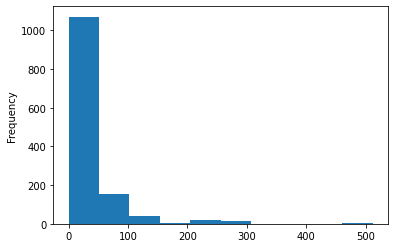

In [33]:
df.fare.plot.hist()

We can use more bins to get a higher resolution histogram.

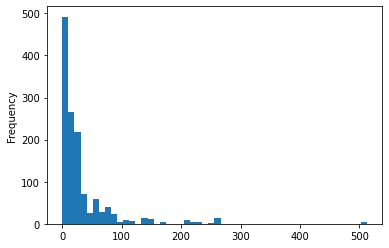

In [34]:
df.fare.plot.hist(bins=50)

From this graph, we see a concentration of values around 10-30 (which we previously identified as the "center") and a spread of about 30-50 (which we previously identified as the "spread"). We also see the outlier who paid more than £500. We also see features that were not obvious before: the skewed shape of the distribution, the gap between £300 and £500, and so on. This single picture has managed to convey more information than a dozen summary statistics.

We might want to plot more than one histogram on the same graphic to make for easy comparison. To do this, we simply make multiple calls to plotting functions within the same cell. For example, if we wanted to compare the distributions of the number of siblings/spouses and the number of parents/children that accompanied passengers, we could call `.plot.hist()` twice.

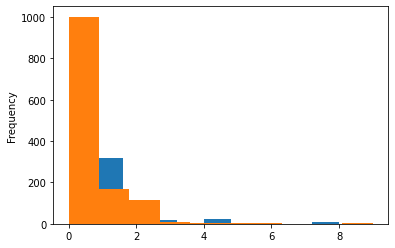

In [35]:
df.sibsp.plot.hist()
df.parch.plot.hist()

Notice that `pandas` automatically plotted the two histograms using different colors. There are two problems with this plot. First, we don't know which color corresponds to which variable. Second, we cannot see the blue histogram underneath the orange histogram because the colors are opaque.

To solve the first problem, we add a legend for each variable by specifying `legend=True`. To solve the second problem, we set the transparency `alpha`, which is a number between 0 and 1, with 0 being perfectly transparent and 1 being completely opaque. Try varying `alpha` to get a feel for what it does.

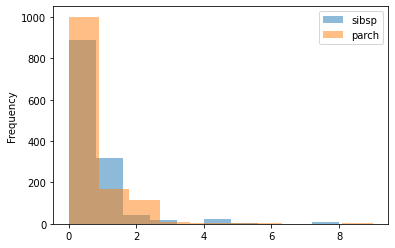

In [36]:
df.sibsp.plot.hist(legend=True, alpha=.5)
df.parch.plot.hist(legend=True, alpha=.5)

The parents/children histogram is higher at 0 and 2, but the sibling/spouse histogram is higher at 1. This makes sense because

1. There were many childless couples on the Titanic (i.e., 0 children).
2. You can only have 1 spouse, but many children travel with 2 parents.

### Densities

Another way to visualize the distribution of a quantitative variable is by plotting its **density**. A density plot turns the jagged histogram into a smooth curve, allowing the user to focus on the general shape of the distribution.

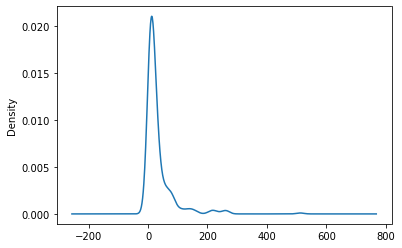

In [37]:
df.fare.plot.density()

The x-axis is too wide. (You cannot have negative fares.) We can set the limits of the x-axis manually using the `xlim` argument.

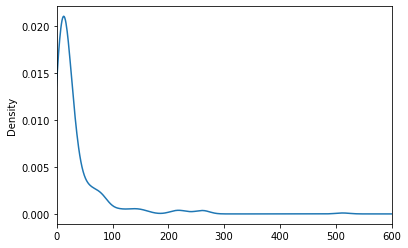

In [38]:
df.fare.plot.density(xlim=(0, 600))

Let's superimpose this density curve on top of the histogram, by making two calls to plotting functions:

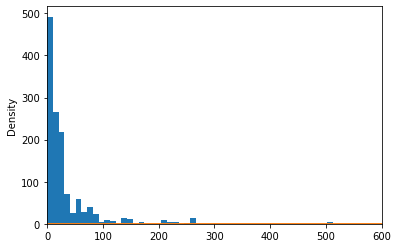

In [39]:
df.fare.plot.hist(bins=50)
df.fare.plot.density(xlim=(0, 600))

If you squint at this plot, you will see an orange line at the bottom of the plot. This is supposed to be the density. But why does it appear as a flat line? The y-axis offers a hint. When we made the density plot earlier, the y-axis extended from 0 to about 0.02. Now the y-axis extends all the way to 500. On such a scale, a curve that fluctuates between 0 and 0.02 will appear to be a flat line!

The problem is that the histogram and the density are currently on different scales. By default, histograms display counts, while densities are defined so that the total area under the curve is 1. To be able to display a histogram and density on the same graph, we have to normalize the histogram so that the total area of the bars is 1. We can do this by setting the option `density=True`.

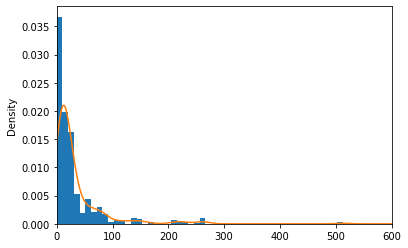

In [40]:
df.fare.plot.hist(bins=50, density=True)
df.fare.plot.density(xlim=(0, 600))

Now we can clearly see how the density smooths the histogram. It does a pretty good job for the most part, but it "oversmooths" near 0, missing the spike.

You might wonder what options are available besides `legend`, `alpha`, `bins`, `density`, and `xlim`. Let's look at the documentation for `.plot.hist()`.

In [41]:
df.fare.plot.hist?

The documentation for `.plot.hist()` tells us about one option, `bins`, but then refers us to `.plot()` for additional options. If you peek inside `.plot()`, you will find the `legend`, `density`, and `xlim` options, as well as many others.

In [42]:
df.fare.plot?

Try these out to get a feel for what they do. For example, can you figure out how to make the density curve red in the above graph? Or how to change the size of the figure?

You might be surprised that `alpha` is not listed among the options above. This is because `alpha` is an option of the `matplotlib` plotting method that `pandas` calls. (Notice that the last argument of `.plot()` is `**kwds`, for "options to pass to matplotlib plotting method".)

### Bar Graphs

To visualize a **categorical variable**, we simply need to represent the frequency of each category. Bar graphs are a simple way to do this.

In a **bar graph**, each bar represents a category, and the height of the bar represents the frequency of that category.

`pandas` does not produce a bar graph directly from a categorical variable. In order to make a bar graph, the variable must be in the form of a `Series` whose index is the categories and whose values are the frequencies. This is exactly what we get when we call `.value_counts()` on a categorical variable. 

So making a bar graph requires two steps:
1. Get the frequency of each category using `.value_counts()`.
2. Call `.plot.bar()` on these frequencies.

For example, here is a bar graph showing how many passengers are in each class.

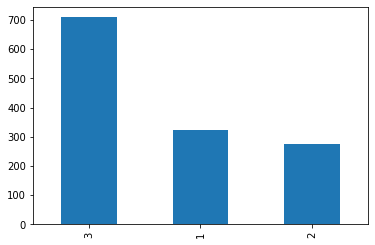

In [43]:
pclass_counts = df.pclass.value_counts()
pclass_counts.plot.bar()

The bar graph makes it clear how many more 3rd class passengers there were than 1st and 2nd class passengers. Bar graphs make it easy to compare categories to each other.

Although bar graphs superficially look similar to histograms (they both have bars), they are not the same. The x-axis on a histogram is a numeric scale, but the x-axis on a bar graph is not, since a bar graph is used to represent categorical variables and the categories are often unordered. For this reason, the bars in a bar graph are typically separated by gaps, to emphasize that the bars do not fall on any particular scale. By contrast, a histogram will not have gaps between the bars, unless there is actually a gap in the data.

The bars in a bar graph are also not guaranteed to be ordered in any particular way. `pandas` will plot the bars in the same order as they appeared in the `Series`. Since `.value_counts()` sorts the categories by frequency, the bar graph was sorted in the same order.

In the case of the passenger class, we probably want the bars in the order 1st, 2nd, 3rd. To do this, we can sort the index of the value counts before passing them to `.plot.bar()`.

1    323
2    277
3    709
Name: pclass, dtype: int64

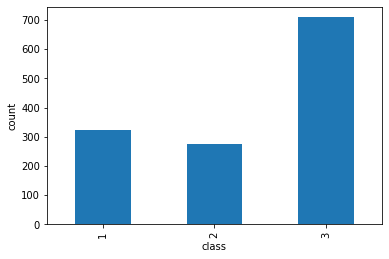

In [44]:
pclass_counts.sort_index(inplace=True)
pclass_counts.plot.bar(ylabel='count', xlabel='class')
pclass_counts

## Summary

- Quantitative and categorical variables are summarized differently.
- For quantitative variables, we typically report a measure of center (e.g., mean, median, quantiles) and a measure of spread (e.g., variance, standard deviation, MAD).
- For categorical variables, we typically report the frequencies of the various categories, either as counts or as proportions.
- Other variables require additional processing before they can be analyzed.

# Exercises

All of the following exercises use the Tips data set (`../data/tips.csv`).

**Exercise 1.** How many people were in the largest party served by the waiter? The smallest?

In [45]:
# YOUR CODE HERE AND ANSWERS HERE (AS COMMENTS)

**Exercise 2.** How could you use the `.quantile()` function to calculate the median? Check that your method works on an appropriate variable from the Tips data set.

In [46]:
# YOUR CODE HERE AND ANSWERS HERE (AS COMMENTS)

**Exercise 3.** Another measure of spread is the **interquartile range**, or IQR, defined as:

$$ \textrm{IQR} = \textrm{75th percentile} - \textrm{25th percentile}. $$

Measure the spread in the total bills by reporting the IQR.

In [47]:
# YOUR CODE HERE AND ANSWERS HERE (AS COMMENTS)

**Exercise 4.** Some people use MAD to refer to the **median absolute deviation**. The median absolute deviation is the same as the mean absolute deviation, but it uses the median instead of the mean:

$$\textrm{M(edian)AD} = \textrm{median of } |x_i - \textrm{median}|. $$

Calculate the median absolute deviation of the total bills. (The median absolute deviation is not built into Pandas, so you will have to implement it from scratch.)

In [48]:
# YOUR CODE HERE AND ANSWERS HERE (AS COMMENTS)

**Exercise 5.** Who pays the bill more often: men or women?

In [49]:
# YOUR CODE HERE AND ANSWERS HERE (AS COMMENTS)

**Exercise 6.** Make a graphic that shows the distribution of total bills. Explain what you see.

In [50]:
# YOUR CODE HERE and TEXT HERE AS COMMENTS

**Exercise 7.** Make a graphic that shows the number of parties this waiter served on each day of the week. Try to make sure your graphic has the days of the week in the right order, starting from Sunday (this is a bit tricky and there are several ways to do this....)

In [51]:
# YOUR CODE HERE and TEXT HERE AS COMMENTS

### When you have filled out all the questions, submit via [Tulane Canvas](https://tulane.instructure.com/)